# Corona Virus Spread Predictions

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Datasets

In [22]:
corona_df = pd.read_csv('./Data/corona_full_data.csv', infer_datetime_format = True)
print(corona_df.shape)
corona_df.head()

(1909, 6)


,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN


In [23]:
air_head = ['index', 'airport_name', 'city', 'country', 
           'IATA', 'ICAO', 'latitude', 'longitude',
          'altitude', 'timezone', 'DST', 'tz_database', 
           'type', 'source']

airports_df = pd.read_csv('./Data/airports-extended.dat', names = air_head, na_values = "\\N").set_index('index')
print(airports_df.shape)
airports_df.head()

(12668, 13)


,airport_name,city,country,IATA,ICAO,latitude,longitude,altitude,timezone,DST,tz_database,type,source
index,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [24]:
route_head = ['airline', 'id', 'source_airport', 'source_airport_id', 
              'destination_airport', 'destination_airport_id', 
              'codeshare', 'stops', 'equipment']

air_routes_df = pd.read_csv('./Data/routes.dat', names = route_head)
print(air_routes_df.shape)
air_routes_df.head()

(67663, 9)


,airline,id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


## Explore data

In [37]:
corona_df = corona_df[~corona_df['location'].str.contains('World')]

In [38]:
total_deaths_country = corona_df.groupby('location')['new_deaths'].sum()

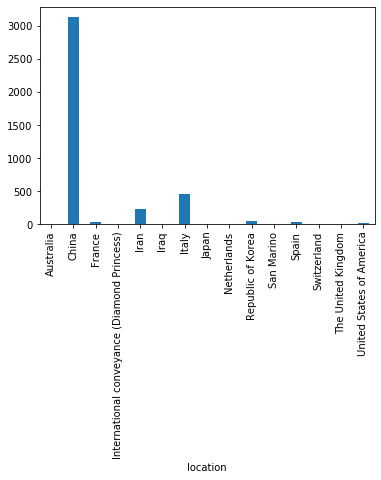

In [39]:
total_deaths_country[total_deaths_country>0].plot.bar()